In [1]:
# Following tutorial found on http://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

In [9]:
# importing libraries
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import keras


In [10]:
# load dataset
df = pandas.read_csv("housing.data.csv", delim_whitespace=True, header=None)

C:\Users\Khalid\AppData\Local\Temp\ipykernel_16148\2303803592.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pandas.read_csv("housing.data.csv", delim_whitespace=True, header=None)


In [11]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [12]:
dataset = df.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]

In [13]:
from sklearn.model_selection import train_test_split

# Assuming you have your features and labels as X and y
# Initial split: training set and temporary set (val + test)
X_train, X_temp, y_train, y_temp = train_test_split(X,Y, test_size=0.4, random_state=42)

# Second split: split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# The resulting sizes will be:
# - X_train: 60% of the original data
# - X_val: 20% of the original data
# - X_test: 20% of the original data


# Training a Baseline model

In [18]:
estimator = Sequential([Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'),
                        Dense(1, kernel_initializer='normal')])
estimator.compile(loss='mean_squared_error', optimizer='adam',metrics = ['mean_absolute_error'])

In [19]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=3,
                                              restore_best_weights = True)

In [20]:
history = estimator.fit(X_train,y_train, 
                        epochs= 1000, validation_data=(X_val , y_val),verbose=True,
                        callbacks=[callback])


Epoch 1/1000
10/10 [==============================] - 0s 16ms/step - loss: 579.6422 - val_loss: 432.3372
Epoch 2/1000
10/10 [==============================] - 0s 5ms/step - loss: 455.4716 - val_loss: 329.7992
Epoch 3/1000
10/10 [==============================] - 0s 4ms/step - loss: 350.9120 - val_loss: 236.3690
Epoch 4/1000
10/10 [==============================] - 0s 4ms/step - loss: 247.9085 - val_loss: 152.5884
Epoch 5/1000
10/10 [==============================] - 0s 4ms/step - loss: 164.9634 - val_loss: 100.3957
Epoch 6/1000
10/10 [==============================] - 0s 5ms/step - loss: 119.5311 - val_loss: 92.5738
Epoch 7/1000
10/10 [==============================] - 0s 4ms/step - loss: 111.7579 - val_loss: 95.4140
Epoch 8/1000
10/10 [==============================] - 0s 5ms/step - loss: 108.5241 - val_loss: 88.2161
Epoch 9/1000
10/10 [==============================] - 0s 4ms/step - loss: 103.4735 - val_loss: 81.5100
Epoch 10/1000
10/10 [==============================] - 0s 4ms/step 

In [21]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [22]:
import matplotlib.pyplot as plt

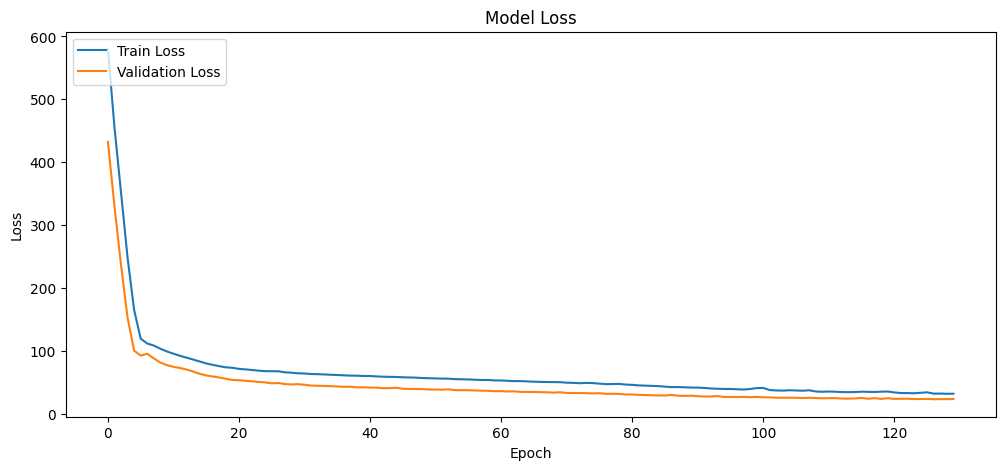

In [23]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')



In [24]:
estimator.evaluate(X_test,y_test)

4/4 [==============================] - 0s 1ms/step - loss: 31.6000


31.600048065185547

# Evaluating model with standardized dataset

In [25]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Fit the scaler on the validation data and transform it
X_val_scaled = scaler.transform(X_val)

# Transform the test data using the same scaler (do not fit again!)
X_test_scaled = scaler.transform(X_test)

In [26]:
X_train_scaled

array([[-0.41578295,  0.87352395, -1.26776279, ...,  0.07059108,
         0.4013224 , -0.76478938],
       [-0.418265  ,  0.53565542, -0.88343563, ...,  0.33739895,
         0.36752652, -0.68194509],
       [-0.40197749,  0.40895473, -0.74002998, ...,  0.38186693,
         0.19043166, -0.39484679],
       ...,
       [-0.42085574,  2.85850154, -1.29214175, ..., -0.55196061,
         0.37086164, -0.89905426],
       [ 0.9876692 , -0.52018372,  1.01525525, ...,  0.87101469,
        -2.75403431,  1.56913414],
       [-0.39384258, -0.52018372, -0.35283471, ...,  1.18229053,
        -3.18815572, -0.23629996]])

In [32]:
scaled_estimator = Sequential([Dense(13, kernel_initializer='normal', activation='relu'),
                        Dense(1, kernel_initializer='normal')])
scaled_estimator.compile(loss='mean_squared_error', optimizer='adam')

In [33]:
history = scaled_estimator.fit(X_train_scaled,y_train, epochs= 1000,
                               validation_data=(X_val_scaled , y_val),
                               verbose=True, callbacks = [callback])

Epoch 1/1000
10/10 [==============================] - 0s 16ms/step - loss: 623.1439 - val_loss: 544.8929
Epoch 2/1000
10/10 [==============================] - 0s 5ms/step - loss: 621.4709 - val_loss: 543.2155
Epoch 3/1000
10/10 [==============================] - 0s 5ms/step - loss: 619.4598 - val_loss: 541.1146
Epoch 4/1000
10/10 [==============================] - 0s 4ms/step - loss: 617.0042 - val_loss: 538.4458
Epoch 5/1000
10/10 [==============================] - 0s 5ms/step - loss: 613.8114 - val_loss: 535.1498
Epoch 6/1000
10/10 [==============================] - 0s 5ms/step - loss: 610.0331 - val_loss: 531.1070
Epoch 7/1000
10/10 [==============================] - 0s 5ms/step - loss: 605.3254 - val_loss: 526.3608
Epoch 8/1000
10/10 [==============================] - 0s 4ms/step - loss: 599.7458 - val_loss: 520.8759
Epoch 9/1000
10/10 [==============================] - 0s 5ms/step - loss: 593.7076 - val_loss: 514.4620
Epoch 10/1000
10/10 [==============================] - 0s 5ms/s

In [35]:
scaled_estimator.evaluate(X_test_scaled,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 24.7465


24.74645233154297

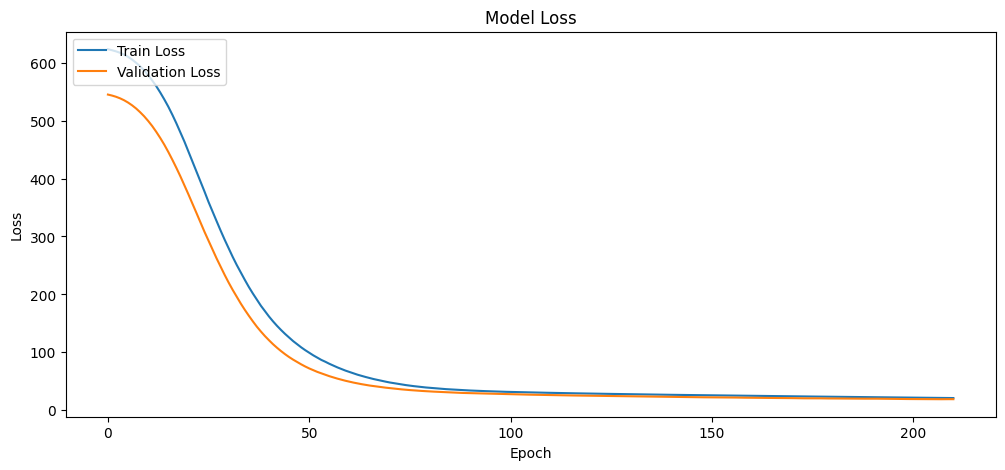

In [36]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

# A larger network

In [37]:
def larger_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu')) # input layer; size 13
    model.add(Dense(6, kernel_initializer='normal', activation='relu')) # hidden layer; size 6
    model.add(Dense(1, kernel_initializer='normal')) # output layer; size 1 with no activation since it's a regression problem
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [40]:
large_estimator = larger_model()
history = large_estimator.fit(X_train_scaled,y_train, epochs= 1000,
                               validation_data=(X_val_scaled , y_val),
                               verbose=True, callbacks = [callback])

Epoch 1/1000
10/10 [==============================] - 0s 16ms/step - loss: 623.6451 - val_loss: 545.9494
Epoch 2/1000
10/10 [==============================] - 0s 4ms/step - loss: 622.9399 - val_loss: 545.1771
Epoch 3/1000
10/10 [==============================] - 0s 5ms/step - loss: 621.9952 - val_loss: 544.0720
Epoch 4/1000
10/10 [==============================] - 0s 5ms/step - loss: 620.5993 - val_loss: 542.3822
Epoch 5/1000
10/10 [==============================] - 0s 5ms/step - loss: 618.3832 - val_loss: 539.7514
Epoch 6/1000
10/10 [==============================] - 0s 4ms/step - loss: 615.0530 - val_loss: 535.6779
Epoch 7/1000
10/10 [==============================] - 0s 5ms/step - loss: 609.7721 - val_loss: 529.6711
Epoch 8/1000
10/10 [==============================] - 0s 5ms/step - loss: 602.3838 - val_loss: 520.9803
Epoch 9/1000
10/10 [==============================] - 0s 4ms/step - loss: 591.8527 - val_loss: 509.1052
Epoch 10/1000
10/10 [==============================] - 0s 4ms/s

In [42]:
large_estimator.evaluate(X_test_scaled,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 24.3141


24.314058303833008

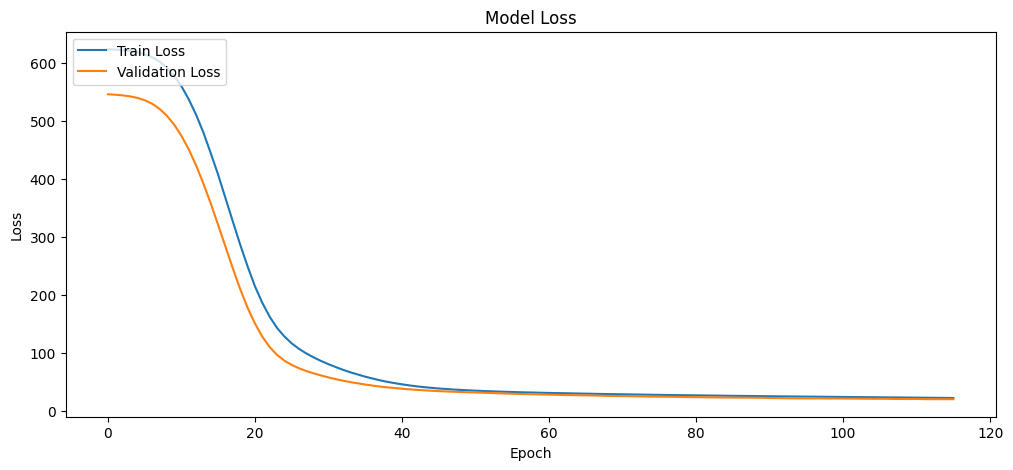

In [41]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

# Wider network

In [44]:
# define wider model
def wider_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [45]:
wide_estimator = wider_model()
history = wide_estimator.fit(X_train_scaled,y_train, epochs= 1000,
                               validation_data=(X_val_scaled , y_val),
                               verbose=True, callbacks = [callback])

Epoch 1/1000
10/10 [==============================] - 0s 16ms/step - loss: 624.0422 - val_loss: 545.3496
Epoch 2/1000
10/10 [==============================] - 0s 4ms/step - loss: 621.6262 - val_loss: 543.1354
Epoch 3/1000
10/10 [==============================] - 0s 4ms/step - loss: 619.2222 - val_loss: 540.7709
Epoch 4/1000
10/10 [==============================] - 0s 4ms/step - loss: 616.5676 - val_loss: 538.0573
Epoch 5/1000
10/10 [==============================] - 0s 4ms/step - loss: 613.4739 - val_loss: 534.8208
Epoch 6/1000
10/10 [==============================] - 0s 5ms/step - loss: 609.7150 - val_loss: 530.8389
Epoch 7/1000
10/10 [==============================] - 0s 5ms/step - loss: 605.0870 - val_loss: 525.8954
Epoch 8/1000
10/10 [==============================] - 0s 5ms/step - loss: 599.3901 - val_loss: 519.9333
Epoch 9/1000
10/10 [==============================] - 0s 5ms/step - loss: 592.5529 - val_loss: 512.9471
Epoch 10/1000
10/10 [==============================] - 0s 5ms/s

In [46]:
wide_estimator.evaluate(X_test_scaled,y_test)

4/4 [==============================] - 0s 1ms/step - loss: 21.0932


21.093212127685547

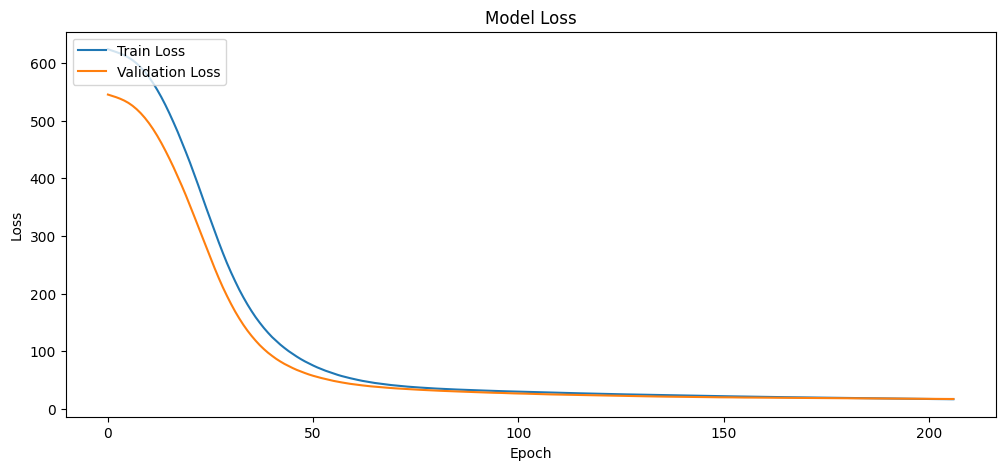

In [47]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

# Using the trained models to predict price on new data

In [50]:
X_new = numpy.array([[2.72900000e-02, 0.00000000e+00, 7.07000000e+00, 
                      0.00000000e+00, 4.69000000e-01, 7.18500000e+00, 
                      6.11000000e+01, 4.96710000e+00, 2.00000000e+00,
                      2.42000000e+02, 1.78000000e+01, 3.92830000e+02,
                      4.03000000e+00]])
print(X_new.shape)

(1, 13)


In [63]:
estimator.predict(X_new)

1/1 [==============================] - 0s 48ms/step


array([[30.161762]], dtype=float32)

In [64]:
import numpy as np

In [65]:
np.expand_dims(X[2],axis = 0) 

array([[2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [66]:

Y_pred = estimator.predict(np.expand_dims(X[2],axis = 0) )
print("Labeled case: %2f" %Y[2])
print("Prediction: %2f" %Y_pred)

1/1 [==============================] - 0s 45ms/step
Labeled case: 34.700000
Prediction: 30.161762


C:\Users\Khalid\AppData\Local\Temp\ipykernel_16148\1209659138.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Prediction: %2f" %Y_pred)
